In [1]:
train=sc.textFile("dac/train100000.txt")
print("Type of data :",type(train))
print("Number of partitions of train_set :",train.getNumPartitions())
print("Number of lines of train_set :",train.count())

Type of data : <class 'pyspark.rdd.RDD'>
Number of partitions of train_set : 2
Number of lines of train_set : 100000


In [2]:
train.take(3)

['0\t1\t1\t5\t0\t1382\t4\t15\t2\t181\t1\t2\t\t2\t68fd1e64\t80e26c9b\tfb936136\t7b4723c4\t25c83c98\t7e0ccccf\tde7995b8\t1f89b562\ta73ee510\ta8cd5504\tb2cb9c98\t37c9c164\t2824a5f6\t1adce6ef\t8ba8b39a\t891b62e7\te5ba7672\tf54016b9\t21ddcdc9\tb1252a9d\t07b5194c\t\t3a171ecb\tc5c50484\te8b83407\t9727dd16',
 '0\t2\t0\t44\t1\t102\t8\t2\t2\t4\t1\t1\t\t4\t68fd1e64\tf0cf0024\t6f67f7e5\t41274cd7\t25c83c98\tfe6b92e5\t922afcc0\t0b153874\ta73ee510\t2b53e5fb\t4f1b46f3\t623049e6\td7020589\tb28479f6\te6c5b5cd\tc92f3b61\t07c540c4\tb04e4670\t21ddcdc9\t5840adea\t60f6221e\t\t3a171ecb\t43f13e8b\te8b83407\t731c3655',
 '0\t2\t0\t1\t14\t767\t89\t4\t2\t245\t1\t3\t3\t45\t287e684f\t0a519c5c\t02cf9876\tc18be181\t25c83c98\t7e0ccccf\tc78204a1\t0b153874\ta73ee510\t3b08e48b\t5f5e6091\t8fe001f4\taa655a2f\t07d13a8f\t6dc710ed\t36103458\t8efede7f\t3412118d\t\t\te587c466\tad3062eb\t3a171ecb\t3b183c5c\t\t']

In [3]:
train = train.map(lambda x: x.split("\t")) \
            .map(lambda l: (l[0], l[1], l[2], l[3], l[4],l[5], l[6], l[7], l[8], l[9],l[10], l[11], l[12], l[13], l[14], l[15], l[16], l[17], l[18], l[19], l[20], l[21], l[22], l[23], l[24], 
                            l[25], l[26], l[27],l[28], l[29], l[30], l[31], l[32], l[33], l[34], l[35], l[36], l[37], l[38], l[39]))
train.take(1)

[('0',
  '1',
  '1',
  '5',
  '0',
  '1382',
  '4',
  '15',
  '2',
  '181',
  '1',
  '2',
  '',
  '2',
  '68fd1e64',
  '80e26c9b',
  'fb936136',
  '7b4723c4',
  '25c83c98',
  '7e0ccccf',
  'de7995b8',
  '1f89b562',
  'a73ee510',
  'a8cd5504',
  'b2cb9c98',
  '37c9c164',
  '2824a5f6',
  '1adce6ef',
  '8ba8b39a',
  '891b62e7',
  'e5ba7672',
  'f54016b9',
  '21ddcdc9',
  'b1252a9d',
  '07b5194c',
  '',
  '3a171ecb',
  'c5c50484',
  'e8b83407',
  '9727dd16')]

In [4]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import HashingTF, Tokenizer
from pyspark.sql import Row
from pyspark.sql.functions import udf
from pyspark.sql.functions import desc
from pyspark.sql.types import *
train_schema = StructType([
    StructField("result", StringType(), True),StructField("IntFeature1", StringType(),True),StructField("IntFeature2", StringType(), True),
    StructField("IntFeature3", StringType(), True),StructField("IntFeature4", StringType(), True),StructField("IntFeature5", StringType(), True),
    StructField("IntFeature6", StringType(), True),StructField("IntFeature7", StringType(), True),StructField("IntFeature8", StringType(), True),
    StructField("IntFeature9", StringType(), True),StructField("IntFeature10", StringType(), True),StructField("IntFeature11", StringType(), True),
    StructField("IntFeature12", StringType(), True),StructField("IntFeature13", StringType(), True),StructField("CatFeature1", StringType(), True),
    StructField("CatFeature2", StringType(), True),StructField("CatFeature3", StringType(), True),StructField("CatFeature4", StringType(), True),
    StructField("CatFeature5", StringType(), True),StructField("CatFeature6", StringType(), True),StructField("CatFeature7", StringType(), True),
    StructField("CatFeature8", StringType(), True),StructField("CatFeature9", StringType(), True),StructField("CatFeature10", StringType(), True),
    StructField("CatFeature11", StringType(), True),StructField("CatFeature12", StringType(), True),StructField("CatFeature13", StringType(), True),
    StructField("CatFeature14", StringType(), True),StructField("CatFeature15", StringType(), True),StructField("CatFeature16", StringType(), True),
    StructField("CatFeature17", StringType(), True),StructField("CatFeature18", StringType(), True),StructField("CatFeature19", StringType(), True),
    StructField("CatFeature20", StringType(), True),StructField("CatFeature21", StringType(), True),StructField("CatFeature22", StringType(), True),
    StructField("CatFeature23", StringType(), True),StructField("CatFeature24", StringType(), True),StructField("CatFeature25", StringType(), True),
    StructField("CatFeature26", StringType(), True)
])
train_df = spark.createDataFrame(train, train_schema)
train_df.printSchema()

root
 |-- result: string (nullable = true)
 |-- IntFeature1: string (nullable = true)
 |-- IntFeature2: string (nullable = true)
 |-- IntFeature3: string (nullable = true)
 |-- IntFeature4: string (nullable = true)
 |-- IntFeature5: string (nullable = true)
 |-- IntFeature6: string (nullable = true)
 |-- IntFeature7: string (nullable = true)
 |-- IntFeature8: string (nullable = true)
 |-- IntFeature9: string (nullable = true)
 |-- IntFeature10: string (nullable = true)
 |-- IntFeature11: string (nullable = true)
 |-- IntFeature12: string (nullable = true)
 |-- IntFeature13: string (nullable = true)
 |-- CatFeature1: string (nullable = true)
 |-- CatFeature2: string (nullable = true)
 |-- CatFeature3: string (nullable = true)
 |-- CatFeature4: string (nullable = true)
 |-- CatFeature5: string (nullable = true)
 |-- CatFeature6: string (nullable = true)
 |-- CatFeature7: string (nullable = true)
 |-- CatFeature8: string (nullable = true)
 |-- CatFeature9: string (nullable = true)
 |-- Ca

In [5]:
import pandas as pd
pd.DataFrame(train_df.take(5), columns=train_df.columns).transpose()

,0,1,2,3,4
result,0,0,0,0,0
IntFeature1,1,2,2,,3
IntFeature2,1,0,0,893,-1
IntFeature3,5,44,1,,
IntFeature4,0,1,14,,0
IntFeature5,1382,102,767,4392,2
IntFeature6,4,8,89,,0
IntFeature7,15,2,4,0,3
IntFeature8,2,2,2,0,0
IntFeature9,181,4,245,0,0


In [6]:
train_df = train_df.select(train_df.result,train_df.IntFeature1.cast('double'),train_df.IntFeature2.cast('double'),train_df.IntFeature3.cast('double'),
               train_df.IntFeature4.cast('double'),train_df.IntFeature5.cast('double'),train_df.IntFeature6.cast('double'),train_df.IntFeature7.cast('double'),
               train_df.IntFeature8.cast('double'),train_df.IntFeature9.cast('double'),train_df.IntFeature10.cast('double'),train_df.IntFeature11.cast('double'),
               train_df.IntFeature12.cast('double'),train_df.IntFeature13.cast('double'),*train_df.columns[14:])
train_df.toPandas().describe().transpose()

,count,mean,std,min,25%,50%,75%,max
IntFeature1,55587.0,3.768723,10.451209,0.0,0.0,1.0,3.0,556.0
IntFeature2,100000.0,112.863730,401.522636,-2.0,0.0,3.0,40.0,18522.0
IntFeature3,80898.0,40.744913,538.818822,0.0,3.0,8.0,23.0,65535.0
IntFeature4,80466.0,8.280317,10.836336,0.0,2.0,5.0,11.0,417.0
IntFeature5,95240.0,17592.599402,65797.898069,0.0,228.0,2213.0,10209.0,1741128.0
IntFeature6,74893.0,139.685084,371.776092,0.0,9.0,37.0,122.0,16290.0
IntFeature7,95281.0,15.222090,65.460487,0.0,0.0,3.0,11.0,8807.0
IntFeature8,99893.0,13.574825,46.541593,0.0,2.0,8.0,20.0,4677.0
IntFeature9,95281.0,125.294907,286.415686,0.0,10.0,40.0,120.0,12661.0
IntFeature10,55587.0,0.620109,0.677055,0.0,0.0,1.0,1.0,6.0


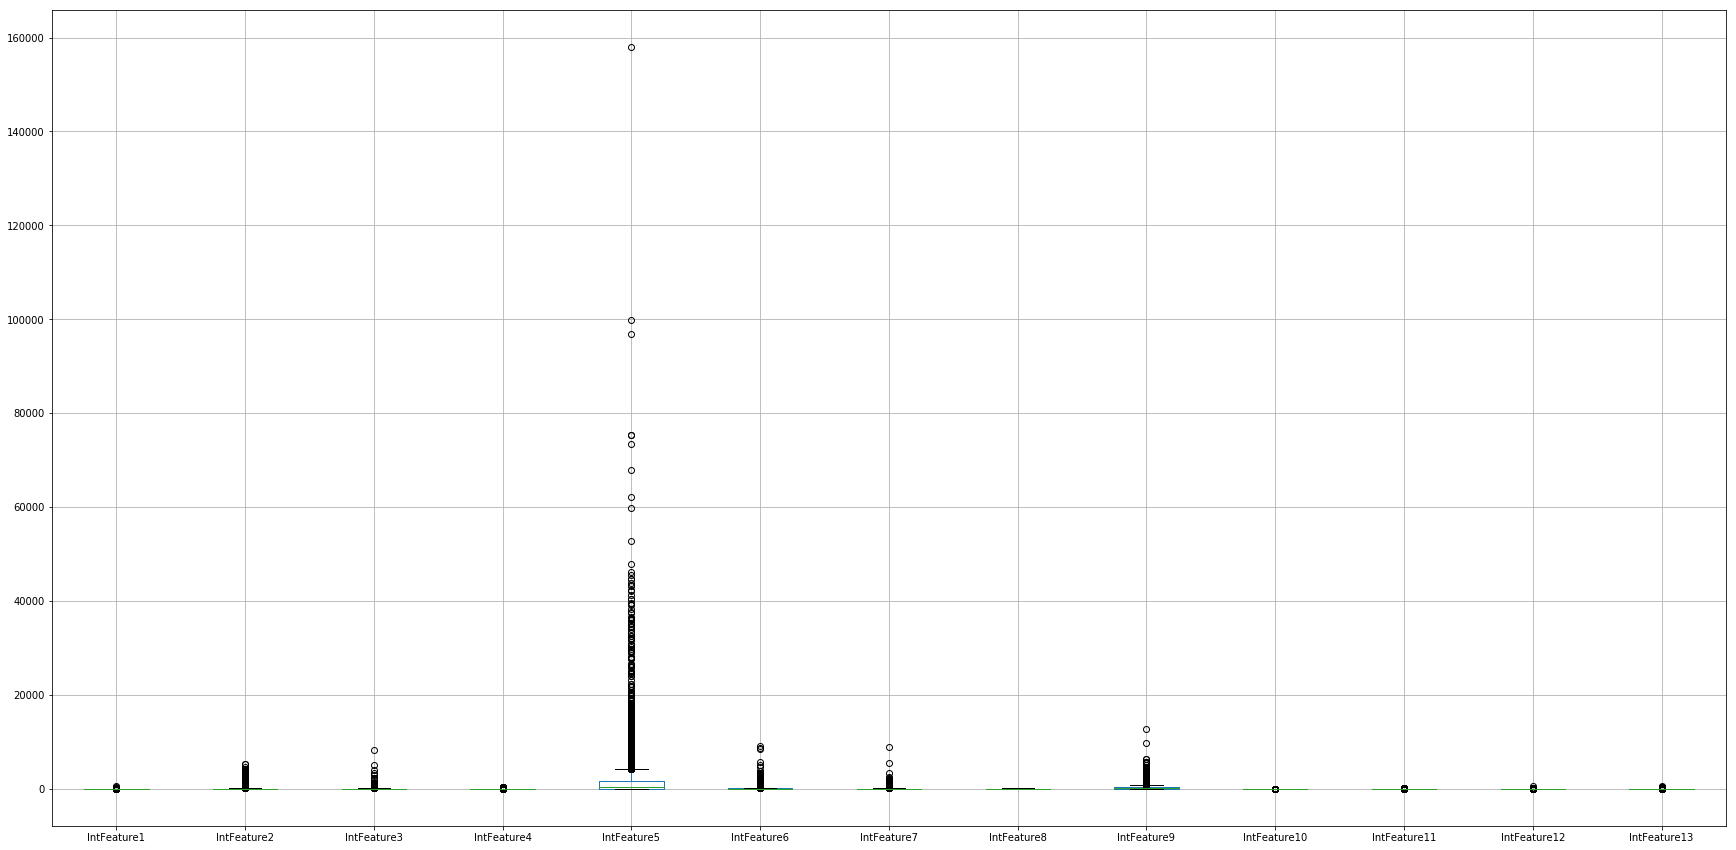

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,15))
data=train_df.toPandas()
data.boxplot()
plt.show()

In [8]:
train_df.groupby("result").count().show()

+------+-----+
|result|count|
+------+-----+
|     0|77337|
|     1|22663|
+------+-----+



In [9]:
for i in range(1,27):
    train_df = train_df.na.replace('', 'NA', 'CatFeature'+str(i))
#pd.DataFrame(train_df.take(5), columns=train_df.columns).transpose()
train_df=train_df.na.drop()
pd.DataFrame(train_df.take(5), columns=train_df.columns).transpose()

,0,1,2,3,4
result,0,1,1,1,0
IntFeature1,2,0,0,0,1
IntFeature2,0,1,20,127,2382
IntFeature3,1,20,2,1,13
IntFeature4,14,16,2,3,4
IntFeature5,767,1548,7188,1683,40
IntFeature6,89,93,170,19,4
IntFeature7,4,42,2,26,69
IntFeature8,2,32,3,17,3
IntFeature9,245,912,24,475,609


In [26]:
train_df.groupby("result").count().show()

+------+-----+
|result|count|
+------+-----+
|     0| 9274|
|     1| 3579|
+------+-----+



In [10]:
from pyspark.ml.feature import StringIndexer, VectorIndexer, VectorAssembler, SQLTransformer,OneHotEncoder
catIndex1 = StringIndexer(inputCol="CatFeature1",outputCol="catIndex1")
catEncoder1 = OneHotEncoder(inputCol=catIndex1.getOutputCol(), outputCol="catEncoder1")
catIndex2 = StringIndexer(inputCol="CatFeature2",outputCol="catIndex2")
catEncoder2 = OneHotEncoder(inputCol=catIndex2.getOutputCol(), outputCol="catEncoder2")
catIndex3 = StringIndexer(inputCol="CatFeature3",outputCol="catIndex3")
catEncoder3 = OneHotEncoder(inputCol=catIndex3.getOutputCol(), outputCol="catEncoder3")
catIndex4 = StringIndexer(inputCol="CatFeature4",outputCol="catIndex4")
catEncoder4 = OneHotEncoder(inputCol=catIndex4.getOutputCol(), outputCol="catEncoder4")
catIndex5 = StringIndexer(inputCol="CatFeature5",outputCol="catIndex5")
catEncoder5 = OneHotEncoder(inputCol=catIndex5.getOutputCol(), outputCol="catEncoder5")
catIndex6 = StringIndexer(inputCol="CatFeature6",outputCol="catIndex6")
catEncoder6 = OneHotEncoder(inputCol=catIndex6.getOutputCol(), outputCol="catEncoder6")
catIndex7 = StringIndexer(inputCol="CatFeature7",outputCol="catIndex7")
catEncoder7 = OneHotEncoder(inputCol=catIndex7.getOutputCol(), outputCol="catEncoder7")
catIndex8 = StringIndexer(inputCol="CatFeature8",outputCol="catIndex8")
catEncoder8 = OneHotEncoder(inputCol=catIndex8.getOutputCol(), outputCol="catEncoder8")
catIndex9 = StringIndexer(inputCol="CatFeature9",outputCol="catIndex9")
catEncoder9 = OneHotEncoder(inputCol=catIndex9.getOutputCol(), outputCol="catEncoder9")
catIndex10 = StringIndexer(inputCol="CatFeature10",outputCol="catIndex10")
catEncoder10 = OneHotEncoder(inputCol=catIndex10.getOutputCol(), outputCol="catEncoder10")
catIndex11 = StringIndexer(inputCol="CatFeature11",outputCol="catIndex11")
catEncoder11 = OneHotEncoder(inputCol=catIndex11.getOutputCol(), outputCol="catEncoder11")
catIndex12 = StringIndexer(inputCol="CatFeature12",outputCol="catIndex12")
catEncoder12 = OneHotEncoder(inputCol=catIndex12.getOutputCol(), outputCol="catEncoder12")
catIndex13 = StringIndexer(inputCol="CatFeature13",outputCol="catIndex13")
catEncoder13 = OneHotEncoder(inputCol=catIndex13.getOutputCol(), outputCol="catEncoder13")
catIndex14 = StringIndexer(inputCol="CatFeature14",outputCol="catIndex14")
catEncoder14 = OneHotEncoder(inputCol=catIndex14.getOutputCol(), outputCol="catEncoder14")
catIndex15 = StringIndexer(inputCol="CatFeature15",outputCol="catIndex15")
catEncoder15 = OneHotEncoder(inputCol=catIndex15.getOutputCol(), outputCol="catEncoder15")
catIndex16 = StringIndexer(inputCol="CatFeature16",outputCol="catIndex16")
catEncoder16 = OneHotEncoder(inputCol=catIndex16.getOutputCol(), outputCol="catEncoder16")
catIndex17 = StringIndexer(inputCol="CatFeature17",outputCol="catIndex17")
catEncoder17 = OneHotEncoder(inputCol=catIndex17.getOutputCol(), outputCol="catEncoder17")
catIndex18 = StringIndexer(inputCol="CatFeature18",outputCol="catIndex18")
catEncoder18 = OneHotEncoder(inputCol=catIndex18.getOutputCol(), outputCol="catEncoder18")
catIndex19 = StringIndexer(inputCol="CatFeature19",outputCol="catIndex19")
catEncoder19 = OneHotEncoder(inputCol=catIndex19.getOutputCol(), outputCol="catEncoder19")
catIndex20 = StringIndexer(inputCol="CatFeature20",outputCol="catIndex20")
catEncoder20 = OneHotEncoder(inputCol=catIndex20.getOutputCol(), outputCol="catEncoder20")
catIndex21 = StringIndexer(inputCol="CatFeature21",outputCol="catIndex21")
catEncoder21 = OneHotEncoder(inputCol=catIndex21.getOutputCol(), outputCol="catEncoder21")
catIndex22 = StringIndexer(inputCol="CatFeature22",outputCol="catIndex22")
catEncoder22 = OneHotEncoder(inputCol=catIndex22.getOutputCol(), outputCol="catEncoder22")
catIndex23 = StringIndexer(inputCol="CatFeature23",outputCol="catIndex23")
catEncoder23 = OneHotEncoder(inputCol=catIndex23.getOutputCol(), outputCol="catEncoder23")
catIndex24 = StringIndexer(inputCol="CatFeature24",outputCol="catIndex24")
catEncoder24 = OneHotEncoder(inputCol=catIndex24.getOutputCol(), outputCol="catEncoder24")
catIndex25 = StringIndexer(inputCol="CatFeature25",outputCol="catIndex25")
catEncoder25 = OneHotEncoder(inputCol=catIndex25.getOutputCol(), outputCol="catEncoder25")
catIndex26 = StringIndexer(inputCol="CatFeature26",outputCol="catIndex26")
catEncoder26 = OneHotEncoder(inputCol=catIndex26.getOutputCol(), outputCol="catEncoder26")

cols_now = ['IntFeature1', 'IntFeature2', 'IntFeature3','IntFeature4', 'IntFeature5', 'IntFeature6', 'IntFeature7', 'IntFeature8', 'IntFeature9',
            'IntFeature10', 'IntFeature11', 'IntFeature12','IntFeature13','catEncoder1', 'catEncoder2', 'catEncoder3', 'catEncoder4', 'catEncoder5', 'catEncoder6', 
            'catEncoder7', 'catEncoder8', 'catEncoder9', 'catEncoder10', 'catEncoder11', 'catEncoder12', 'catEncoder13','catEncoder14', 'catEncoder15', 
            'catEncoder16', 'catEncoder17', 'catEncoder18', 'catEncoder19', 'catEncoder20', 'catEncoder21', 'catEncoder22', 'catEncoder23', 'catEncoder24', 
            'catEncoder25', 'catEncoder26']
vectorAssembler=VectorAssembler(inputCols=cols_now, outputCol='features')
labelIndexer = StringIndexer(inputCol='result', outputCol="label")

In [11]:
pipeline = Pipeline(stages=[catIndex1,catIndex2,catIndex3,catIndex4,catIndex5,catIndex6,catIndex7,catIndex8,
                            catIndex9,catIndex10,catIndex11,catIndex12,catIndex13,catIndex14,catIndex15,catIndex16,
                            catIndex17,catIndex18,catIndex19,catIndex20,catIndex21,catIndex22,catIndex23,catIndex24,
                            catIndex25,catIndex26,catEncoder1,catEncoder2,catEncoder3,catEncoder4,catEncoder5,catEncoder6,
                            catEncoder7,catEncoder8,catEncoder9,catEncoder10,catEncoder11,catEncoder12,catEncoder13,
                            catEncoder14,catEncoder15,catEncoder16,catEncoder17,catEncoder18,catEncoder19,catEncoder20,
                            catEncoder21,catEncoder22,catEncoder23,catEncoder24,catEncoder25,catEncoder26,
                            vectorAssembler,labelIndexer])

from time import time
t0 = time()
traindf_transformer = pipeline.fit(train_df).transform(train_df)
#traindf_transformer.cache()
t1 = time() - t0
print ("transform the datas in {} seconds".format(round(t1,3)))

transform the datas in 76.073 seconds


In [12]:
df1,df2=traindf_transformer.randomSplit([0.7, 0.3])

In [13]:
pd.DataFrame(df1.select("features","label").take(5), columns=["features","label"])

,features,label
0,"(0.0, -1.0, 1.0, 1.0, 1765.0, 42.0, 56.0, 21.0...",0.0
1,"(0.0, -1.0, 1.0, 1.0, 8638.0, 281.0, 5.0, 30.0...",0.0
2,"(0.0, -1.0, 1.0, 6.0, 0.0, 204.0, 60.0, 13.0, ...",0.0
3,"(0.0, -1.0, 1.0, 19.0, 1530.0, 67.0, 52.0, 0.0...",0.0
4,"(0.0, -1.0, 1.0, 23.0, 3169.0, 147.0, 62.0, 0....",0.0


In [14]:
lr = LogisticRegression(labelCol='label', featuresCol='features',maxIter=5, regParam=0.001)
t0 = time()
model = lr.fit(df1)
t1 = time() - t0
print ("model trained in {} seconds".format(round(t1,3)))

model trained in 13.983 seconds


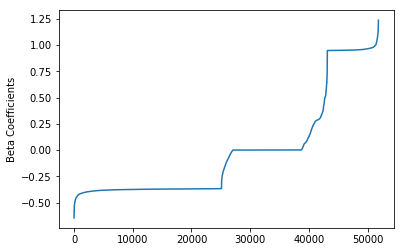

In [15]:
import numpy as np
beta = np.sort(model.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

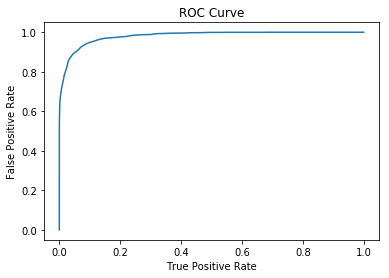

Training set areaUnderROC: 0.9806762633557123


In [16]:
trainingSummary = model.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

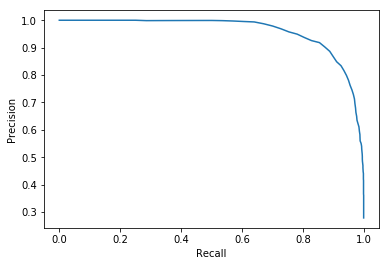

In [17]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [18]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
predictions = model.transform(df2)
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

from pyspark.ml.evaluation import MulticlassClassificationEvaluator 
evalulator_a = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evalulator_a.evaluate(predictions)
print("Test Accuracy = %g" % accuracy)

evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1 = evaluator_f1.evaluate(predictions)
print("Test F1 = %g" % f1)

evaluator_wp = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
wp = evaluator_wp.evaluate(predictions)
print("Test Weighted Precision = %g" % wp)

evaluator_wr = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
wr = evaluator_wr.evaluate(predictions)
print("Test Weighted Recall = %g" % wr)

Test Area Under ROC 0.6790142539956947
Test Accuracy = 0.714211
Test F1 = 0.699459
Test Weighted Precision = 0.692733
Test Weighted Recall = 0.714211


In [19]:
from pyspark.ml.classification import DecisionTreeClassifier
t0 = time()
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 10)
model = dt.fit(df1)
t1 = time() - t0
print ("model trained in {} seconds".format(round(t1,3)))

model trained in 118.633 seconds


In [20]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
predictions = model.transform(df2)
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

from pyspark.ml.evaluation import MulticlassClassificationEvaluator 
evalulator_a = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evalulator_a.evaluate(predictions)
print("Test Accuracy = %g" % accuracy)

evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1 = evaluator_f1.evaluate(predictions)
print("Test F1 = %g" % f1)

evaluator_wp = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
wp = evaluator_wp.evaluate(predictions)
print("Test Weighted Precision = %g" % wp)

evaluator_wr = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
wr = evaluator_wr.evaluate(predictions)
print("Test Weighted Recall = %g" % wr)

Test Area Under ROC 0.43966034473991966
Test Accuracy = 0.733507
Test F1 = 0.702083
Test Weighted Precision = 0.702912
Test Weighted Recall = 0.733507


In [21]:
from pyspark.ml.classification import RandomForestClassifier
t0 = time()
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
model = rf.fit(df1)
t1 = time() - t0
print ("model trained in {} seconds".format(round(t1,3)))

model trained in 56.001 seconds


In [22]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
predictions = model.transform(df2)
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

from pyspark.ml.evaluation import MulticlassClassificationEvaluator 
evalulator_a = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evalulator_a.evaluate(predictions)
print("Test Accuracy = %g" % accuracy)

evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1 = evaluator_f1.evaluate(predictions)
print("Test F1 = %g" % f1)

evaluator_wp = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
wp = evaluator_wp.evaluate(predictions)
print("Test Weighted Precision = %g" % wp)

evaluator_wr = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
wr = evaluator_wr.evaluate(predictions)
print("Test Weighted Recall = %g" % wr)

Test Area Under ROC 0.6622660632870624
Test Accuracy = 0.722295
Test F1 = 0.605831
Test Weighted Precision = 0.52171
Test Weighted Recall = 0.722295


In [23]:
from pyspark.ml.classification import GBTClassifier
t0 = time()
gbt = GBTClassifier(maxIter=10)
gbtModel = gbt.fit(df1)
t1 = time() - t0
print ("model trained in {} seconds".format(round(t1,3)))

model trained in 497.644 seconds


In [24]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
predictions = model.transform(df2)
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

from pyspark.ml.evaluation import MulticlassClassificationEvaluator 
evalulator_a = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evalulator_a.evaluate(predictions)
print("Test Accuracy = %g" % accuracy)

evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1 = evaluator_f1.evaluate(predictions)
print("Test F1 = %g" % f1)

evaluator_wp = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
wp = evaluator_wp.evaluate(predictions)
print("Test Weighted Precision = %g" % wp)

evaluator_wr = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
wr = evaluator_wr.evaluate(predictions)
print("Test Weighted Recall = %g" % wr)

Test Area Under ROC 0.6622660632870625
Test Accuracy = 0.722295
Test F1 = 0.605831
Test Weighted Precision = 0.52171
Test Weighted Recall = 0.722295


In [39]:
prediction1=predictions.select("label","prediction").toPandas()

In [48]:
prediction1.prediction=0.0

In [49]:
prediction1.head(10)

,label,prediction
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [51]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
print('Test Area Under ROC', evaluator.evaluate(predictions))

from pyspark.ml.evaluation import MulticlassClassificationEvaluator 
evalulator_a = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evalulator_a.evaluate(prediction1)
print("Test Accuracy = %g" % accuracy)

evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1 = evaluator_f1.evaluate(prediction1)
print("Test F1 = %g" % f1)

evaluator_wp = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
wp = evaluator_wp.evaluate(prediction1)
print("Test Weighted Precision = %g" % wp)

evaluator_wr = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
wr = evaluator_wr.evaluate(prediction1)
print("Test Weighted Recall = %g" % wr)

Test Area Under ROC 0.6622660632870624


AttributeError: 'DataFrame' object has no attribute '_jdf'

https://towardsdatascience.com/machine-learning-with-pyspark-and-mllib-solving-a-binary-classification-problem-96396065d2aa

https://www.datacamp.com/community/tutorials/apache-spark-tutorial-machine-learning?utm_source=adwords_ppc&utm_campaignid=898687156&utm_adgroupid=48947256715&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=1t1&utm_creative=255768618198&utm_targetid=aud-299261629574:dsa-473406582395&utm_loc_interest_ms=&utm_loc_physical_ms=9056462&gclid=EAIaIQobChMIzLGz1vL73gIVDOJ3Ch2HsAZPEAAYASAAEgI4V_D_BwE#evaluate

https://blog.csdn.net/shenxiaoming77/article/details/63715525